# Oregonator system
http://www.scholarpedia.org/article/Oregonator

## Setup the Environment

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:
import gillespy2

## Build the Oregonator Model

In [3]:
def build_oregonator(parameter_values=None):
    # Initializa Model
    model = gillespy2.Model(name="Oregonator")

    # Define Species
    F = gillespy2.Species(name="F", initial_value=2)
    A = gillespy2.Species(name="A", initial_value=250)
    B = gillespy2.Species(name="B", initial_value=500)
    C = gillespy2.Species(name="C", initial_value=1000)
    P = gillespy2.Species(name="P", initial_value=0)
    
    # Add Species to Model
    model.add_species([F, A, B, C, P])

    # Define Parameters
    k1 = gillespy2.Parameter(name="k1", expression=2.0)
    k2 = gillespy2.Parameter(name="k2", expression=0.1)
    k3 = gillespy2.Parameter(name="k3", expression=104)
    k4 = gillespy2.Parameter(name="k4", expression=4e-7)
    k5 = gillespy2.Parameter(name="k5", expression=26.0)
    
    # Add Parameters to Model
    model.add_parameter([k1, k2, k3, k4, k5])

    # Define Reactions
    reaction1 = gillespy2.Reaction(name="reaction1", reactants={B: 1, F: 1}, products={A: 1, F: 1}, rate=k1)
    reaction2 = gillespy2.Reaction(name="reaction2", reactants={A: 1, B: 1}, products={P: 1}, rate=k2)
    reaction3 = gillespy2.Reaction(
        name="reaction3", reactants={A: 1, F: 1},  products={A: 2, C: 1, F: 1}, rate=k3
    )
    reaction4 = gillespy2.Reaction(name="reaction4", reactants={A: 2}, products={P: 1}, rate=k4)
    reaction5 = gillespy2.Reaction(name="reaction5", reactants={C: 1, F: 1}, products={B: 1, F: 1}, rate=k5)
    
    # Add Reactions to Model
    model.add_reaction([reaction1, reaction2, reaction3, reaction4, reaction5])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=5, num_points=50)
    
    # Add Timespan to Model
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = build_oregonator()

## Run the Simulations

In [5]:
results = model.run(algorithm="SSA")

In [6]:
ode_results = model.run(algorithm="ODE")

## Visualizations

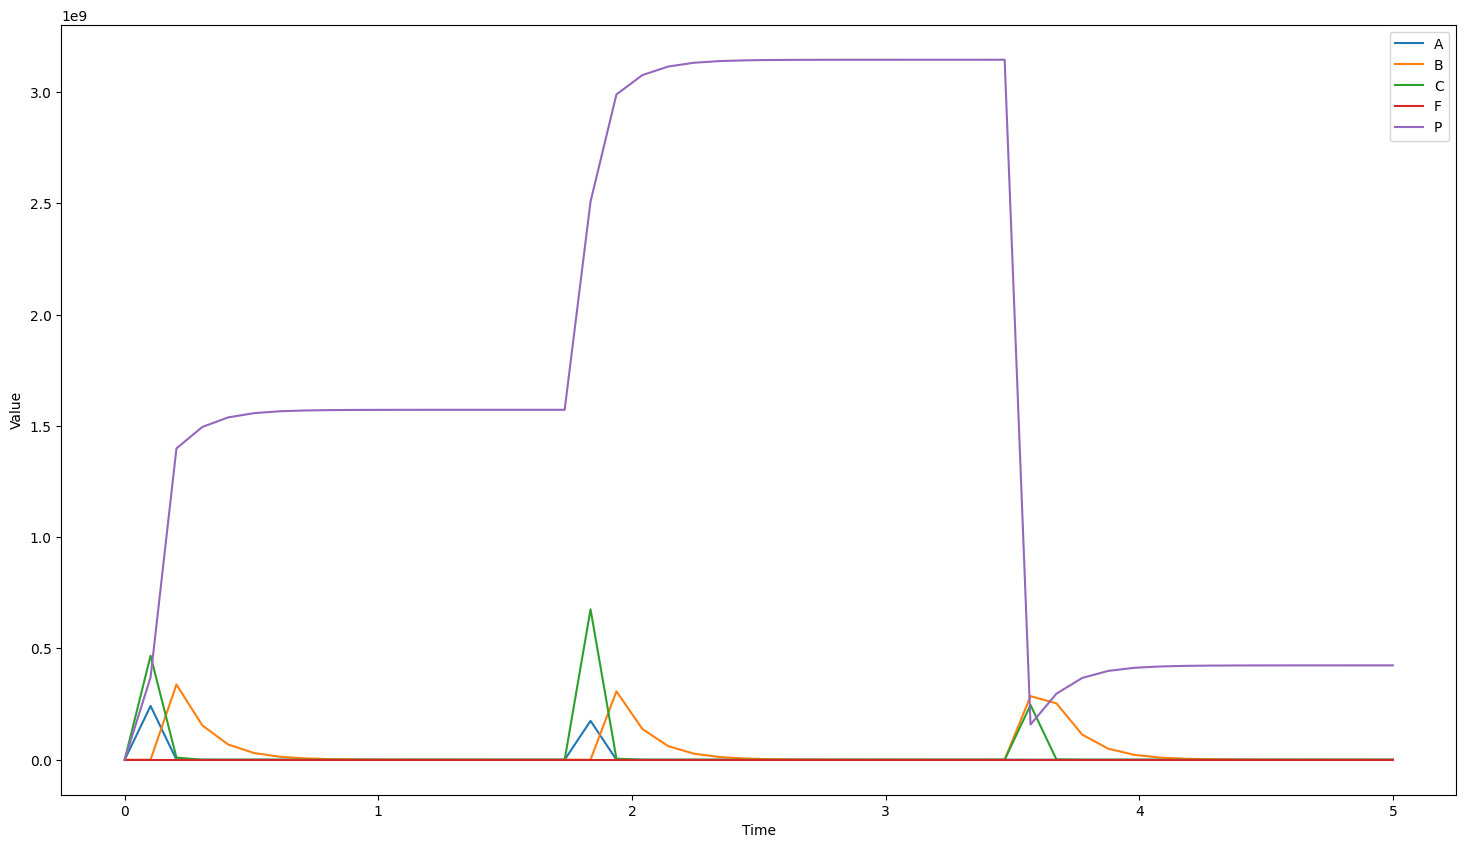

In [7]:
results.plot()

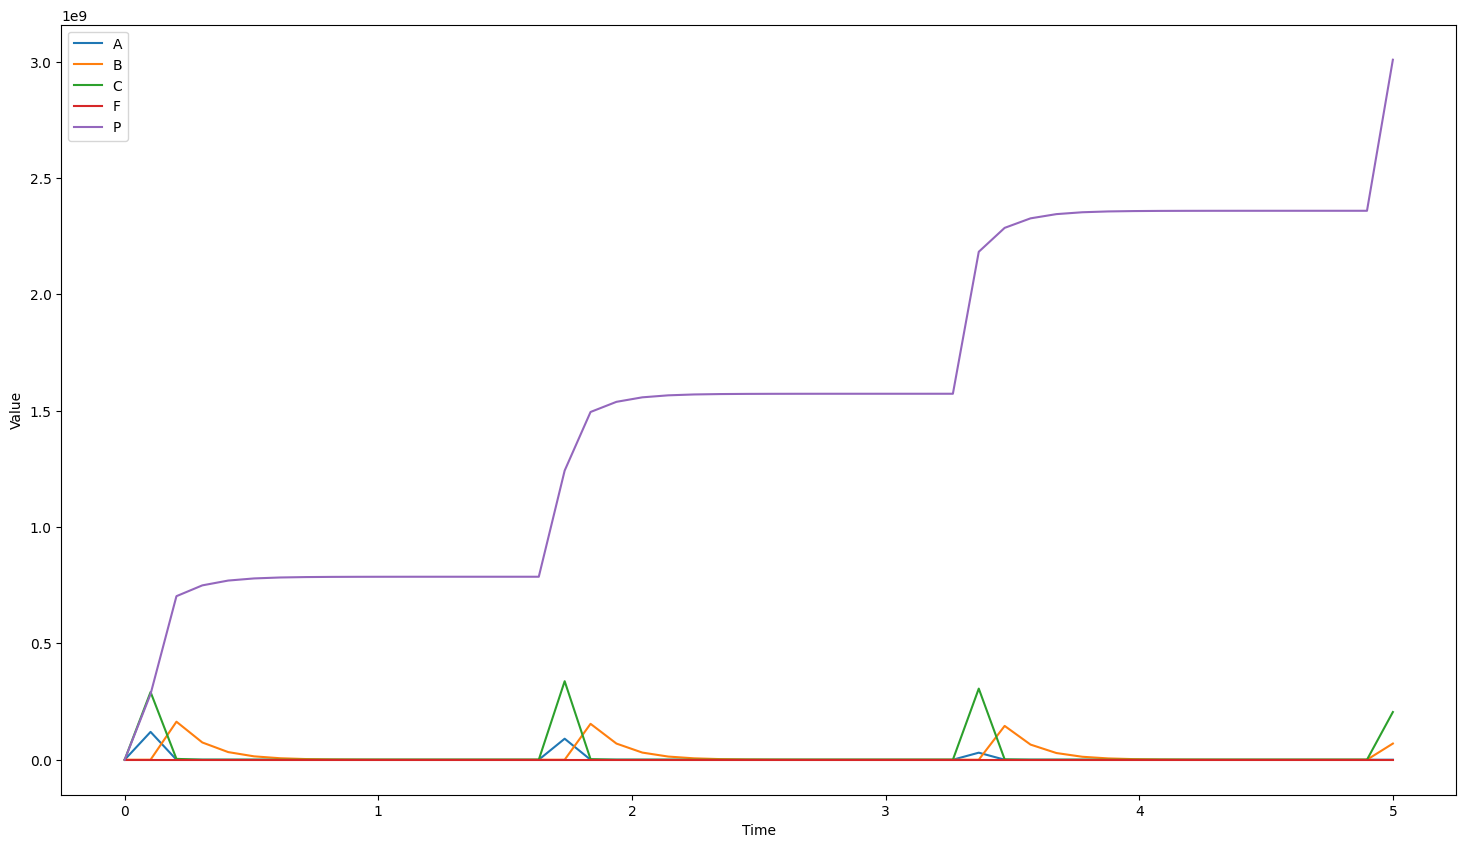

In [8]:
ode_results.plot()